# IC 4.9 Part 2_Visualizations

# Table of Contents
##### 1. Import libraries and data
##### 2. Check data shape
##### 3. Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column
##### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.
##### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
##### 6. Determine whether there's a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.
##### 7. Explore whether there is a connection between age and spending power (income) using a scatterplot. 
##### 8. Export charts

## 1. Import libraries and data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
# Create path
path = r'C:\Users\ashle\Documents\07-2024 Instacart Basket Analysis'

# Import data
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## 2. Check data shape

In [4]:
ords_prods_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,median_days,order_frequency_flag,Gender,STATE,Age,date_joined,number_of_dependents,family_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both


In [5]:
ords_prods_all.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_label', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_purchase_price', 'spending_flag', 'median_days',
       'order_frequency_flag', 'Gender', 'STATE', 'Age', 'date_joined',
       'number_of_dependents', 'family_status', 'income', '_merge'],
      dtype='object')

In [6]:
ords_prods_all.shape

(32404859, 32)

## 3. Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

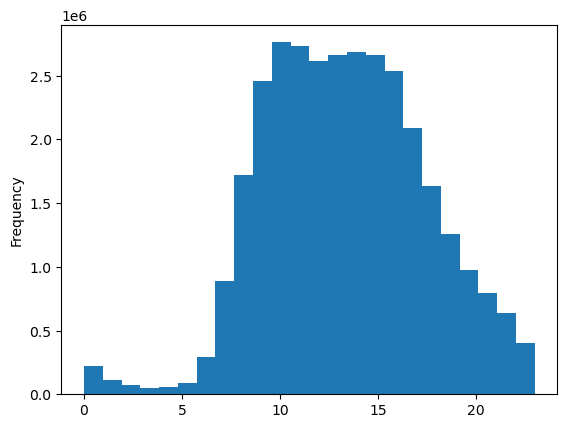

In [25]:
# Create histogram showing the distrubution of sales by order hour of the day
hist_sales_order_hour = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

The histogram tells us that the majority of sales occur at 1000 hour through 1600 hour (10am - 4pm) and sales tapers off later in the afternoon/evening. Very minimal sales occur between 2300 and 0700 hours (11pm - 7am). Sales begin to pick up around 0800 (8am) until they peak at 1000 (10am).

## 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

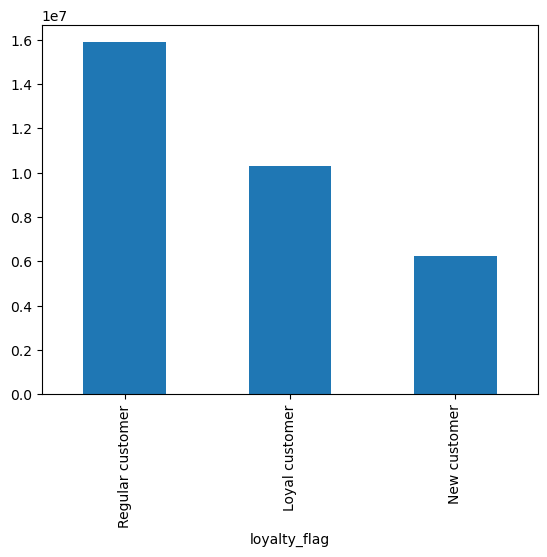

In [28]:
# Create bar chart on 'loyalty_flag' frequency
bar_loyalty = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [30]:
# Create representative sample including 'prices' and 'order_hour_of_day'

In [31]:
len(ords_prods_all)

32404859

In [32]:
len(big) + len(small)

32404859

In [33]:
# Create a new 'df_small_order_hour' dataframe and reference the representative sample 'small' created earlier.
df_small_order_hour = small[['prices', 'order_hour_of_day']]

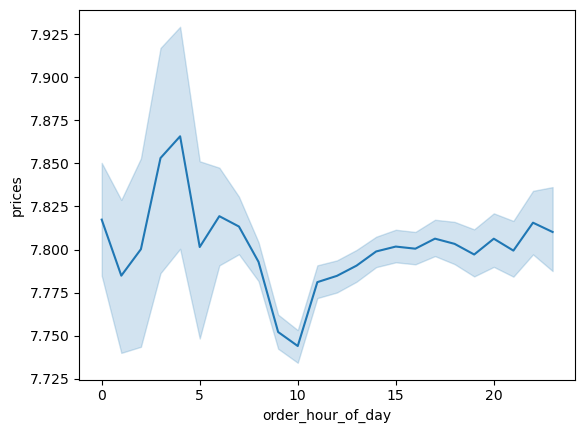

In [34]:
# Create line chart using representative sample showing prices by order_hour_of_day.
line_sales_order_hour = sns.lineplot(data = df_small_order_hour, x = 'order_hour_of_day', y = 'prices')

The line plot tells us that prices tend to be higher with more variability in pricing early in the morning with a peak around 4am. After the peak, there is a dip in pricing around 10am. From 10am onward through the remainder of the day, the pricing is more stable with less variability. 

## 6. Determine whether there's a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [37]:
# Use representative sample 'small' and create a new dataframe containing the 'Age' and 'number_of_dependents'
df_small_age_dependents = small[['Age', 'number_of_dependents']]

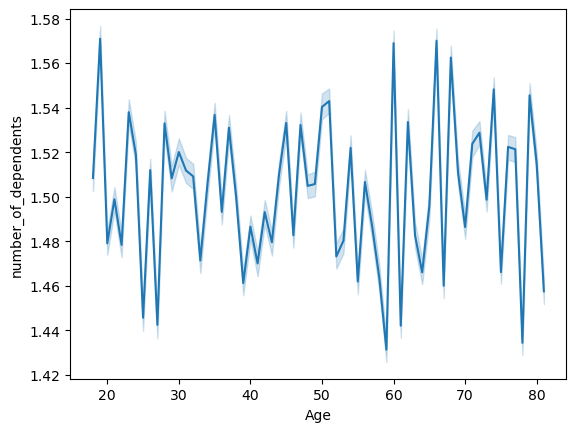

In [38]:
# Create line chart using representative sample showing number_of_dependents by age
line_age_dependents = sns.lineplot(data = df_small_age_dependents, x = 'Age', y = 'number_of_dependents')

There is no clear pattern connecting age to number of dependents. The fluctuations are very pronounced, indicating that the number of dependents does not increase or decrease with age. The variability (or confidence level) is narrow which indicates that the average number of dependents is fairly stable despite individual variations.

## 7. Explore whether there is a connection between age and spending power (income) using a scatterplot.

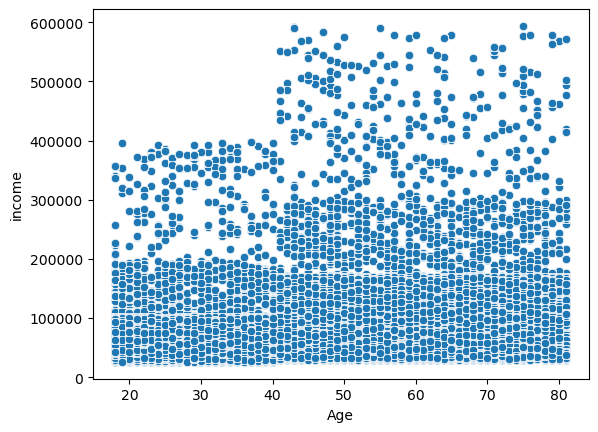

In [41]:
# Create a scatterplot from the full dataframe 'ords_prods_all' showing income by age
scatter_age_income = sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_all)

It appears there is some pattern between age and income. There is a distinct cluster in incomes between 200,000 and less across all ages. We see another cluster of incomes between 200,000 and 300,000 from ages 40 and up. There is another cluster (more spread out) of incomes greater than 300,000 from ages 40 and up. The highest income ages 18 - 40 is about 400,000. 

This shows that after age 40, there is a slight increase in income (spending power). 

## 8. Export charts

In [46]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'), dpi=300, bbox_inches='tight')

In [47]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_prices.png'), dpi=300, bbox_inches='tight')

In [48]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_day_prices.png'), dpi=300, bbox_inches='tight')

In [52]:
line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependents.png'), dpi=300, bbox_inches='tight')

In [53]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'), dpi=300, bbox_inches='tight')